In [1]:
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
from matplotlib import pyplot as plt

Mounted at /content/drive


In [19]:
X_train=[]
X_test = []
X = []
for i in range(32):
    for j in range(6):
        image = Image.open("/content/drive/My Drive/ORL/s"+str(i+1)+"/"+str(j+1)+".pgm")
        X.append(np.array(image))
X_train = np.array(X)

X = []
for i in range(32,40):
    for j in range(6,10):
        image = Image.open("/content/drive/My Drive/ORL/s"+str(i+1)+"/"+str(j+1)+".pgm")
        X.append(np.array(image))
X_test = np.array(X)

img_dim=(112,92)

In [20]:
def Generate_Basis(X_train):
  X_train = X_train.reshape(X_train.shape[0], -1)
  X_train = X_train.T
  X_mean = np.mean(X_train, axis=1)
  X_mean = X_mean.reshape(X_mean.shape[0], 1)
  X_train = X_train - X_mean
  U, S, V = np.linalg.svd(X_train, full_matrices=False)

  return U, X_mean

def Reconstruct(U, X_mean, klist, img):
  img = img.reshape(1, -1)
  img = img.T
  img = img - X_mean
  for k in klist:
    Ur = U[:,:k]
    alpha = Ur.T.dot(img)
    recon_image = Ur.dot(alpha).reshape(img_dim) + X_mean.reshape(img_dim)
    print("K value =",k)
    plt.imshow(recon_image, cmap = 'gray')
    plt.show()

Original Validation Image


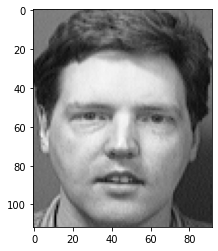

K value = 2


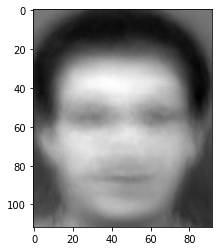

K value = 10


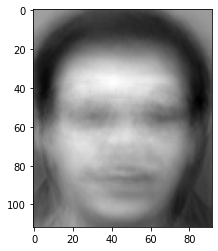

K value = 20


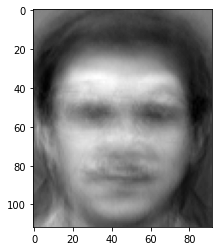

K value = 50


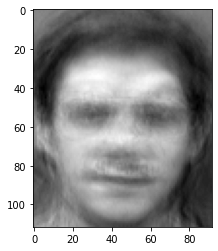

K value = 75


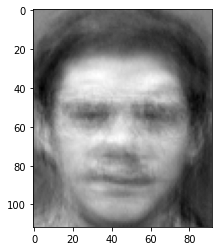

K value = 100


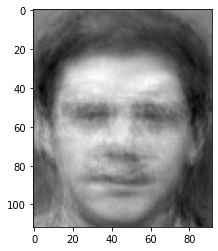

K value = 125


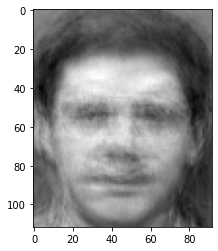

K value = 150


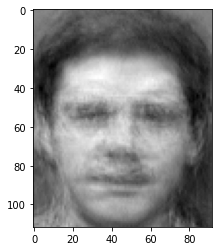

K value = 175


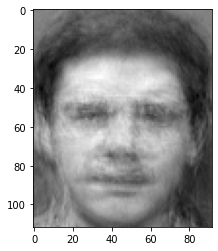

In [21]:
img_index = 20

print("Original Validation Image")
plt.imshow(X_test[20],cmap='gray')
plt.show()
U, X_mean = Generate_Basis(X_train)
Reconstruct(U, X_mean, klist = [2, 10, 20, 50, 75, 100, 125, 150, 175], img = X_test[img_index])